# **KogSys-ML-B Introduction to Machine Learning**
## **Decision Trees in Scikit Learn**
---

To set up a conda environment suitable for this notebook, you can use the following console commands:

```bash
conda create -y -n dtrees python=3.13
conda activate dtrees
python -m pip install -r requirements.txt
```

**Note**: Conda can become very hard-drive hungry when you use many environments. Consider regularly deleting environments you no longer need and running the ``conda clean --all`` command to remove no longer needed packages and cached files.

In [2]:
# This cell imports all resources required for this notebook. Feel free to add more if necessary.

import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### **Data Preprocessing**

Use the ``load_wine()`` function to load the wine toy-dataset from Scikit-Learn with the additional parameter ``as_frame=True``. The result is a ``Bunch`` object, a ``dict``-based datatype implemented by Scikit-Learn. Inspect the loaded object:

1. Check which data and metadata you have loaded by calling the ``keys()`` method on the dictionary.
2. Check the description of the dataset (Hint: solving 1. tells you how to do this)
3. What is the difference between the keys ``"data"``, ``"target"``, and ``"frame"``?

In [5]:
# your code
df = load_wine(as_frame=True)


In [ ]:
# data is all parameters without the target parameter
# target is only the target parameter
# frame is whole dataset including the target parameter

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Perform a dataset split using sensible split sizes. Remember the ID3 algorithm. Does it benefit from a validation set?

Decide which elements of the dataset you want to work with (data, target, frame). Note that your decision will affect how you need to approach some of the next tasks.

**Note:** Scikit-Learn's ``DecisionTreeClassifier`` only uses the ``ID3`` algorithm for constructing the tree when using ``criterion="entropy"``, but your decision regarding the validation set applies to the other algorithms used as well. 

In [6]:
# your code
target = df.target
df = df.data
df_train, df_test, target_train, target_split = train_test_split(df, target, test_size = 0.2, random_state = 123)

### **Training the Tree**

_Create a `DecisionTreeClassifier()` object. You do not need to adjust any parameters of the tree._

In [ ]:
# your code
id_3 = DecisionTreeClassifier(criterion = 'entropy')


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


_Train the tree on your training split using the object's `fit()` method._

In [15]:
# your code
tree =id_3.fit(df_train, target_train)

### **Evaluating the Tree**

_Calculate the accuracy of the decision tree using the tree object's `score()` method._

In [12]:
# your code
id_3.score(df_train, target_train)

1.0

**Note**: Even if the tree is set up to choose the best splitting attribute in each step (default), the results may not be deterministic. The fit method still makes random choices when attributes have equal values for the criterion. If ``max_features`` is set to a value lower than the number of attributes in the dataset, a random choice is made which attributes are even considered in each step. Note that for continuous values, an interval split must be decided, which may also lead to non-deterministic results.

Finally, use the ``plot_tree`` function to display the tree. The plot uses ``matplotlib``'s ``Figure`` objects, i.e. you can control the image size and resolution by calling ``plt.figure`` with the appropriate attributes before calling ``plot_tree``. You can make your plot more interpretable by specifying some of the ``plot_tree`` parameters, e.g. ``filled`` and ``feature_names``.

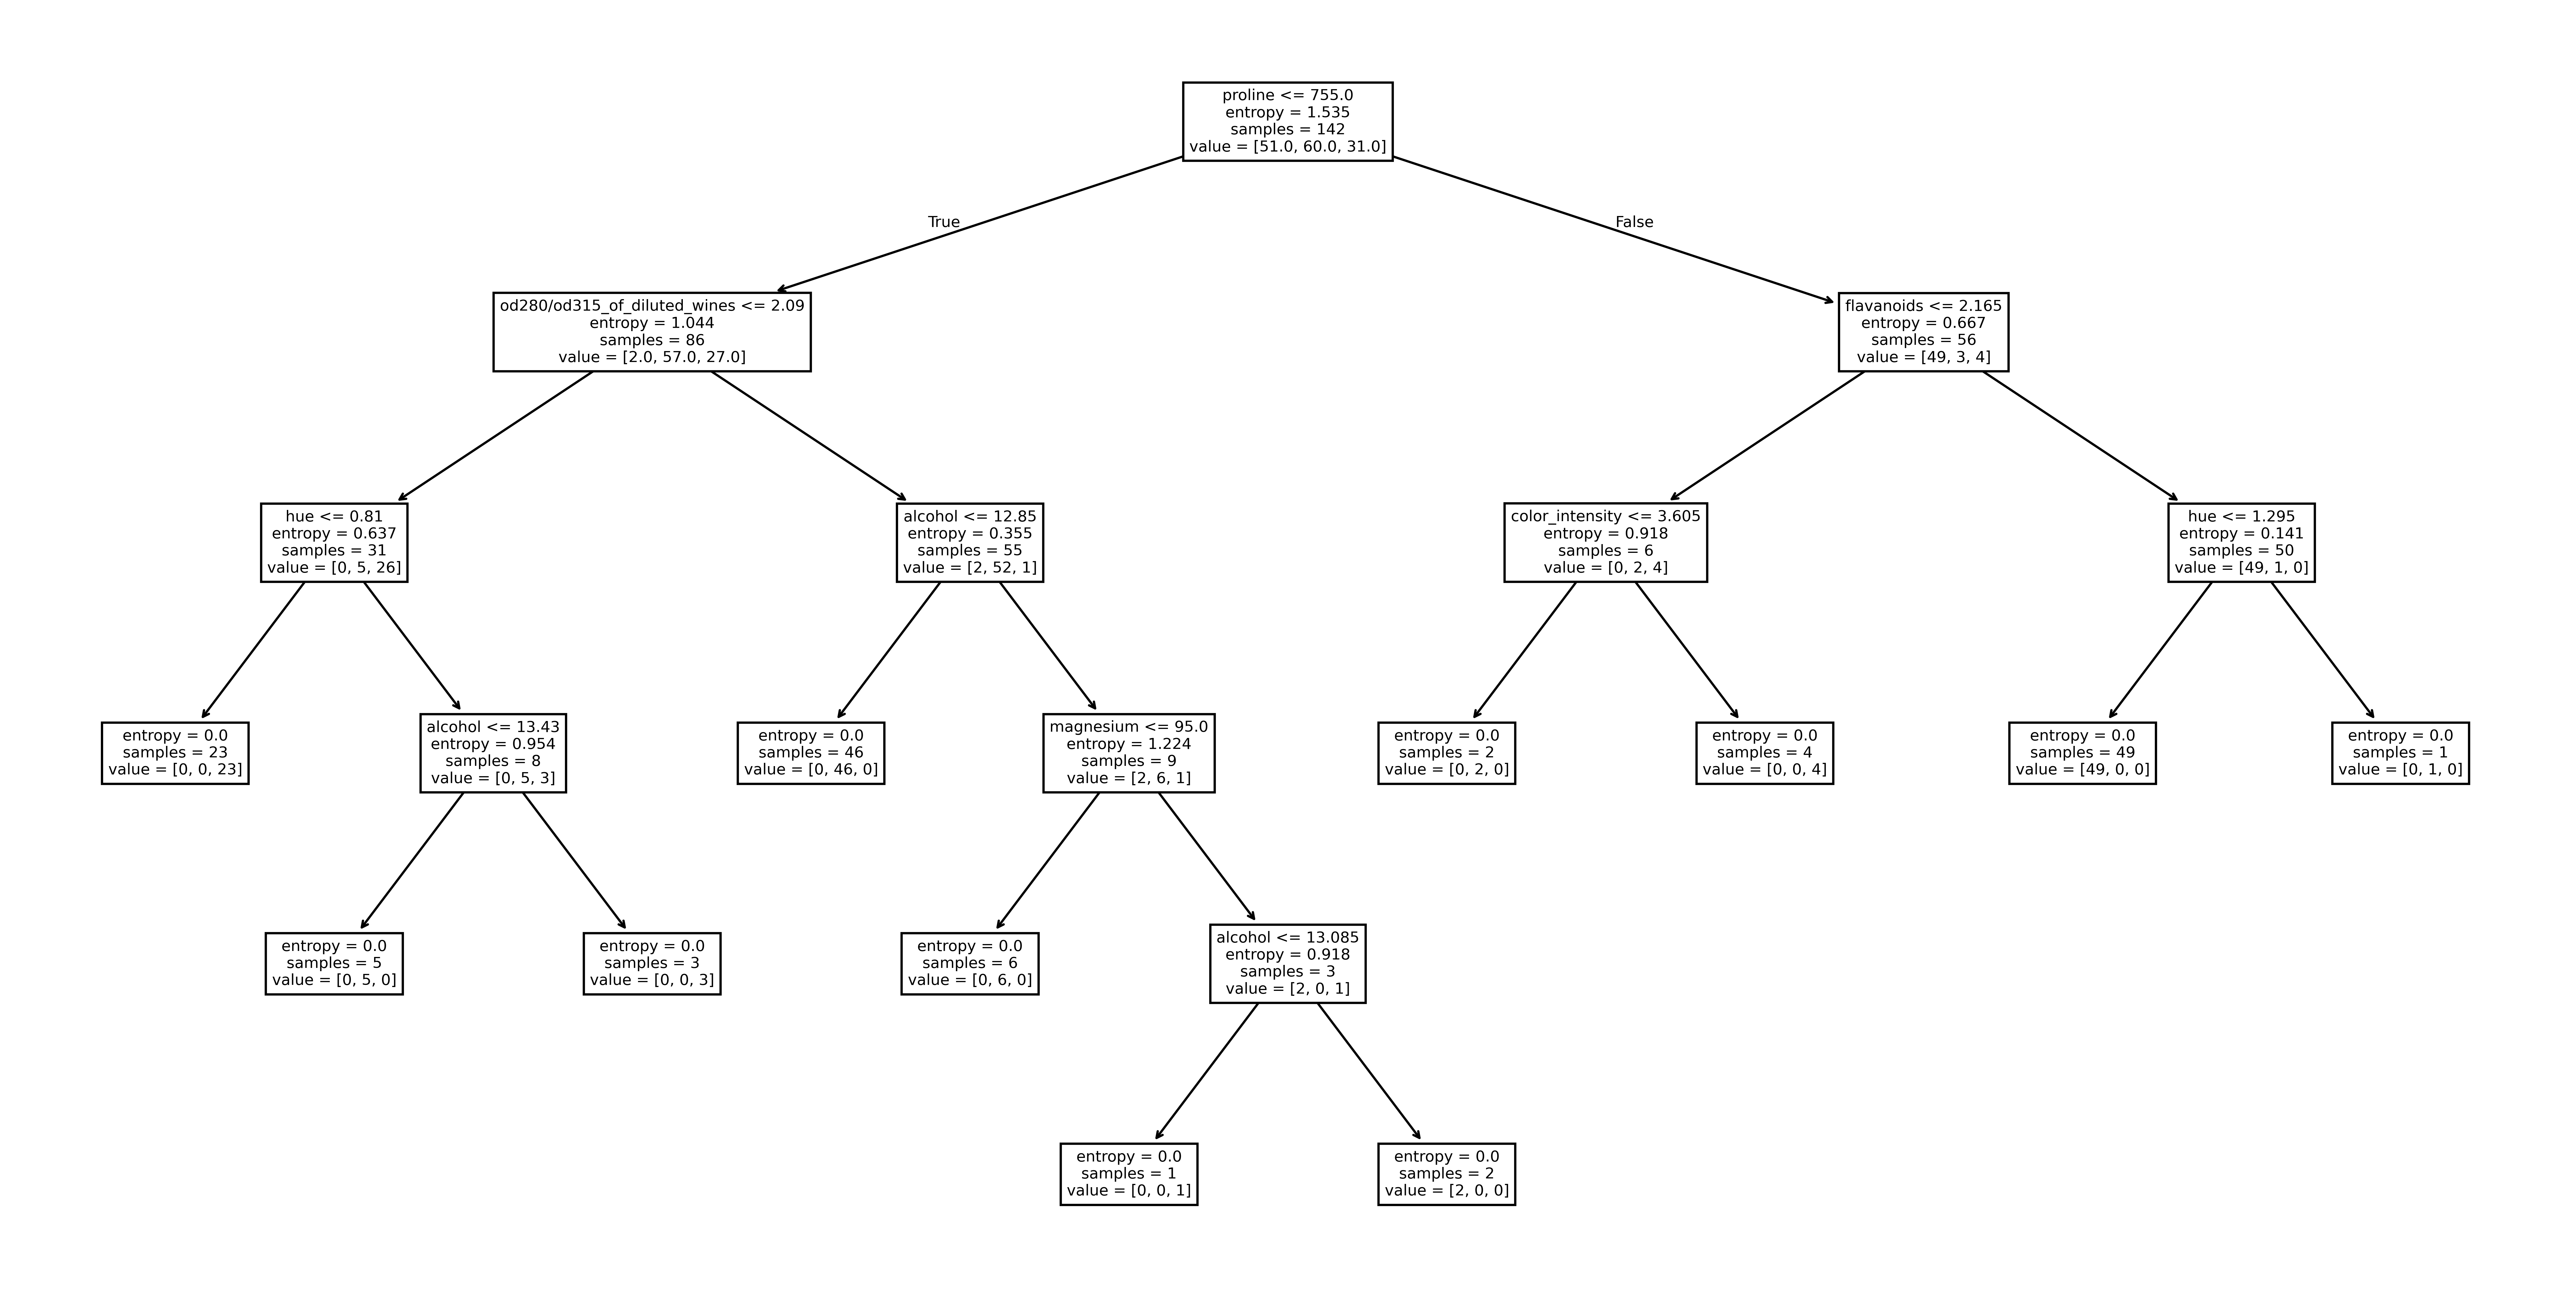

In [25]:
# your code
plt.figure(figsize=(20, 10), dpi = 600)
plot_tree(tree, feature_names = df_train.keys())
plt.show()

### 